#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from utils.plt_setting import plt_settings
from utils.evaluation import regression_evaluation, f_importances, plot_actual_pred
from utils.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-sub-scaled-X')
df_y = read_data('2a-sub-y')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: 0.657722, MAPE: 17.703934, MSE: 3156874220246.838867, RMSE: 1776759.471692, MAE: 854871.759195
`LIN` object has no attribute `feature_importances_`


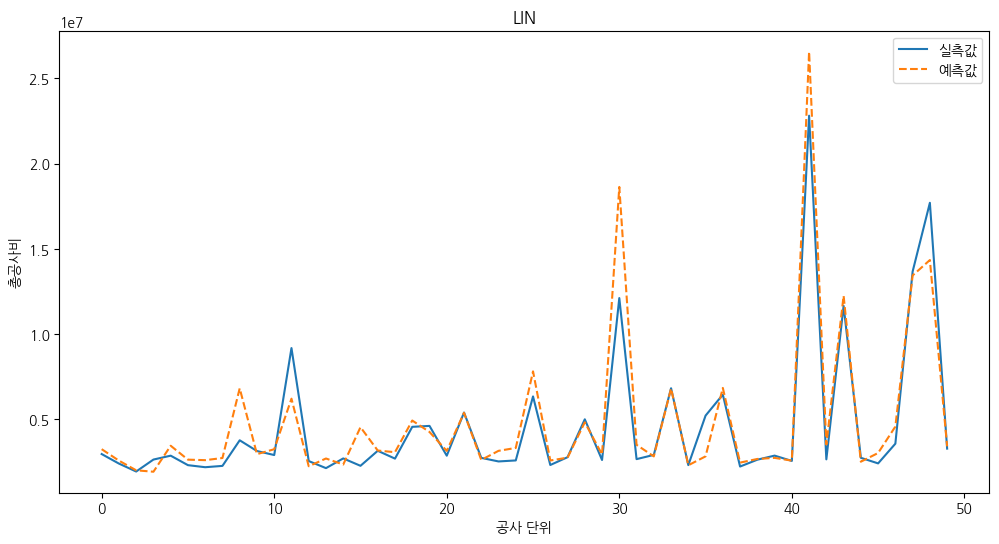

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+16, tolerance: 8.658e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.657695, MAPE: 17.703699, MSE: 3157122627671.377441, RMSE: 1776829.374946, MAE: 854858.228810
`LASSO` object has no attribute `feature_importances_`


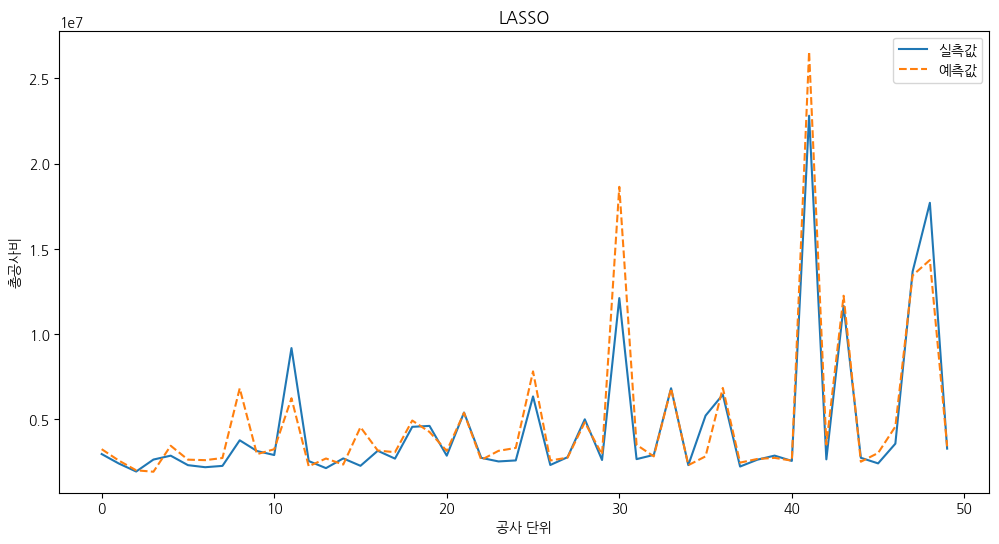

Evaluation: RIDGE
R2_SCORE: 0.657682, MAPE: 17.705141, MSE: 3157249677911.775879, RMSE: 1776865.126539, MAE: 854858.584717
`RIDGE` object has no attribute `feature_importances_`


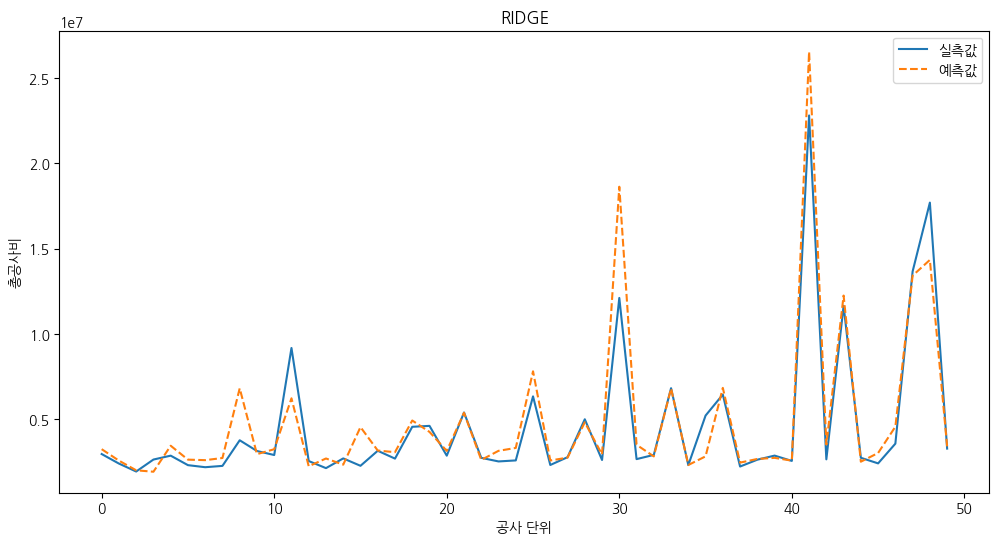

Evaluation: KNR
R2_SCORE: 0.591681, MAPE: 18.085084, MSE: 3765981421545.041992, RMSE: 1940613.671380, MAE: 911396.509179
`KNR` object has no attribute `feature_importances_`


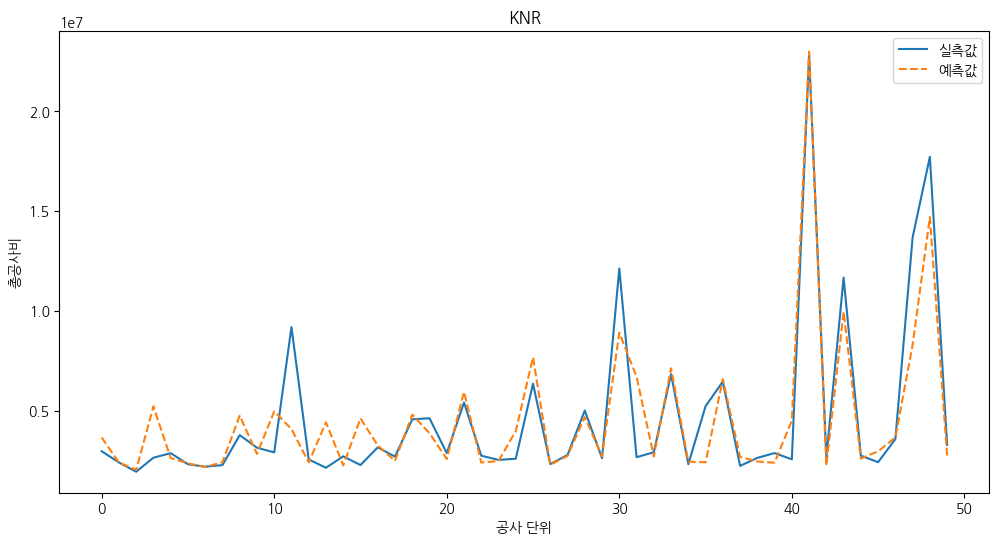

Evaluation: DTR
R2_SCORE: 0.357745, MAPE: 21.603860, MSE: 5923605067532.873047, RMSE: 2433845.736182, MAE: 1080935.633729


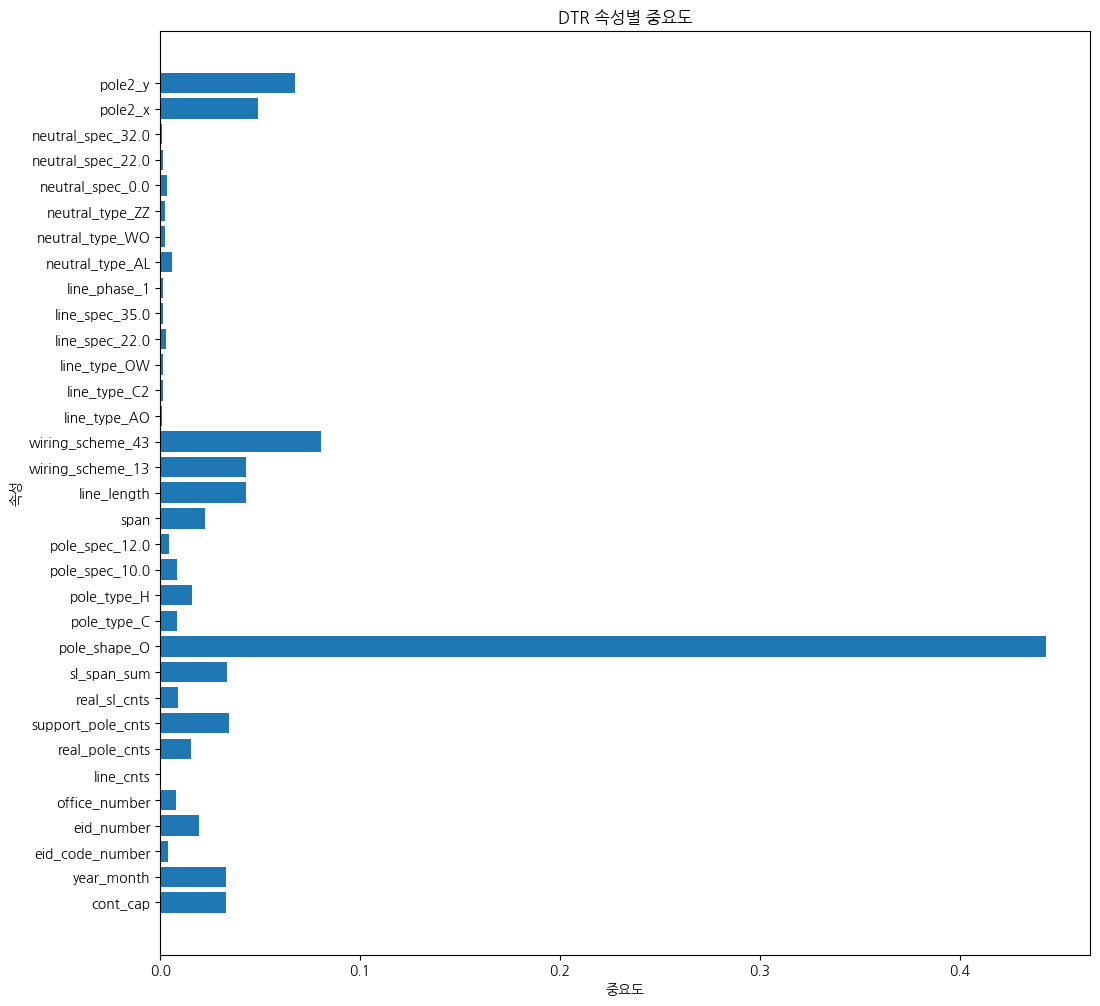

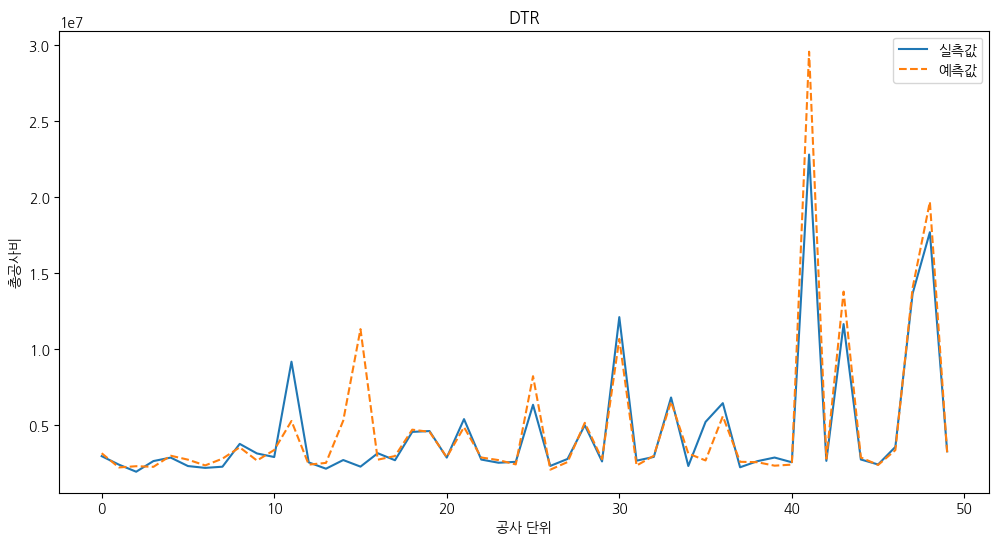

/tmp/ipykernel_7942/3261526636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Evaluation: RFR
R2_SCORE: 0.657350, MAPE: 17.169967, MSE: 3160304846563.864746, RMSE: 1777724.626190, MAE: 851919.025900


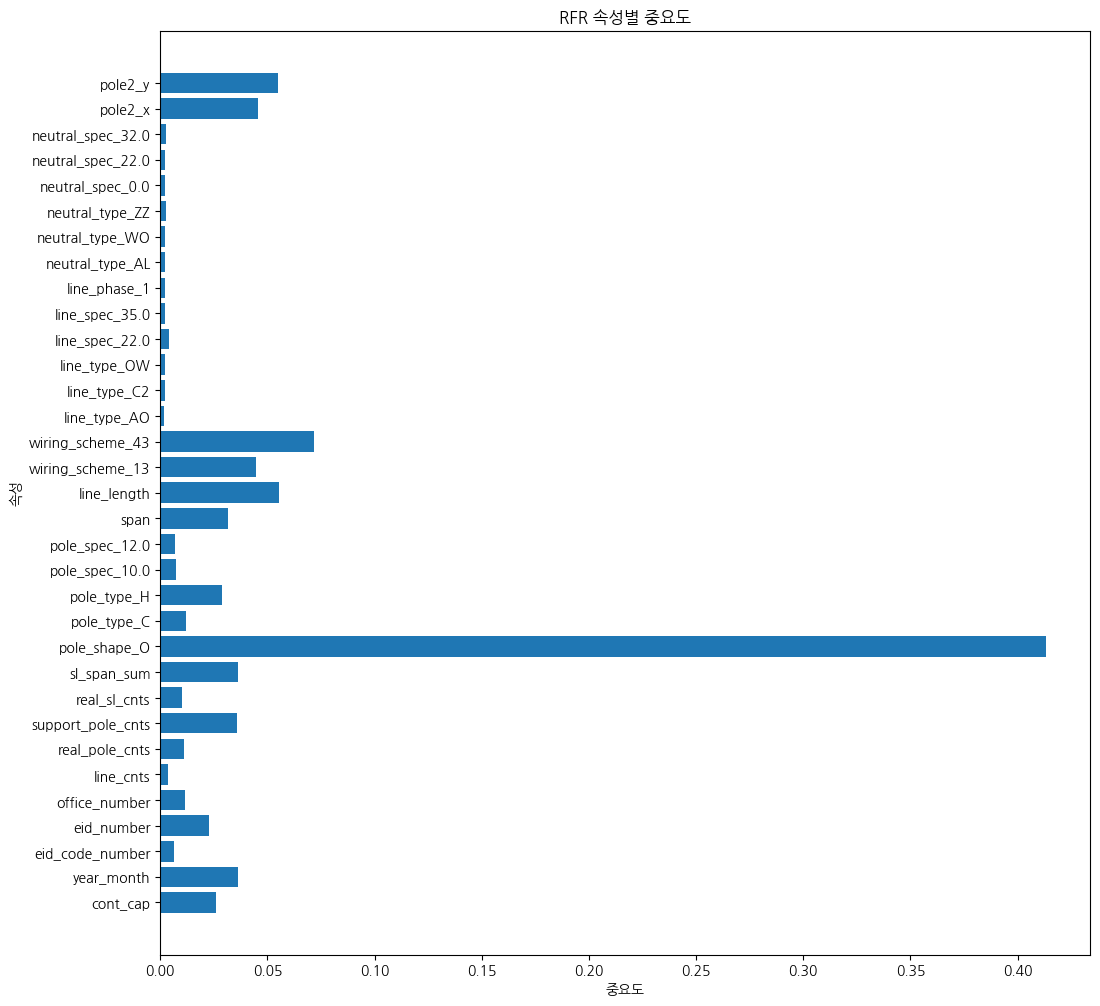

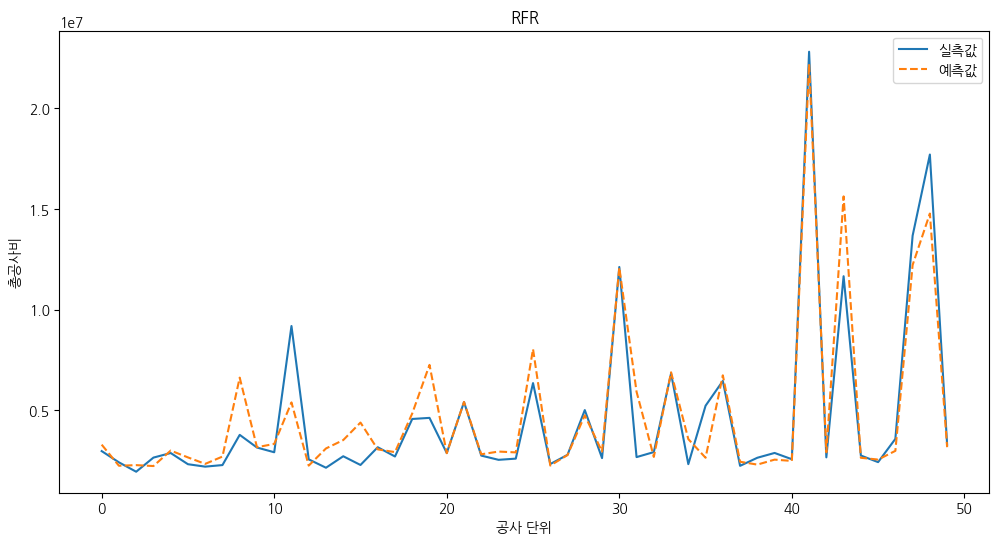

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.669503, MAPE: 16.257981, MSE: 3048221401801.964355, RMSE: 1745915.634217, MAE: 814687.512576


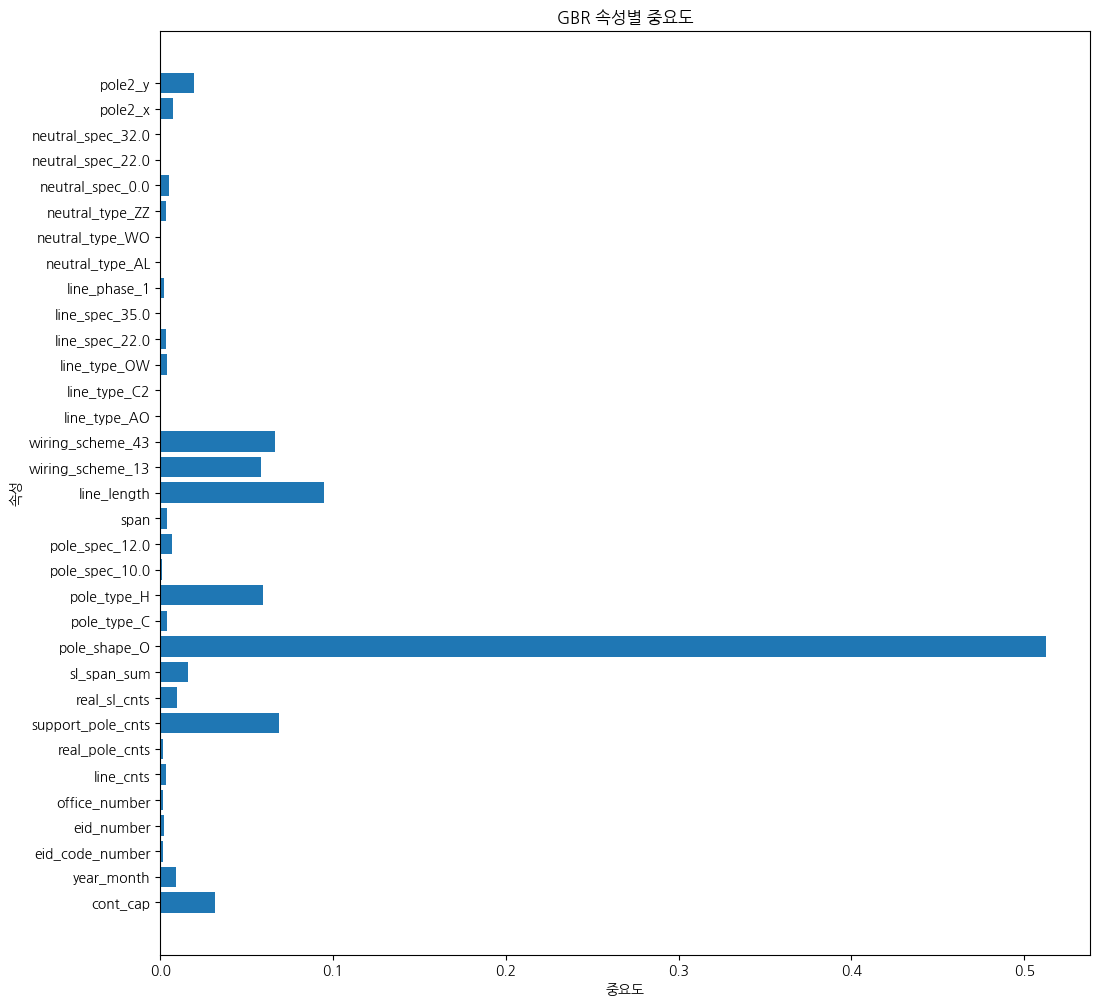

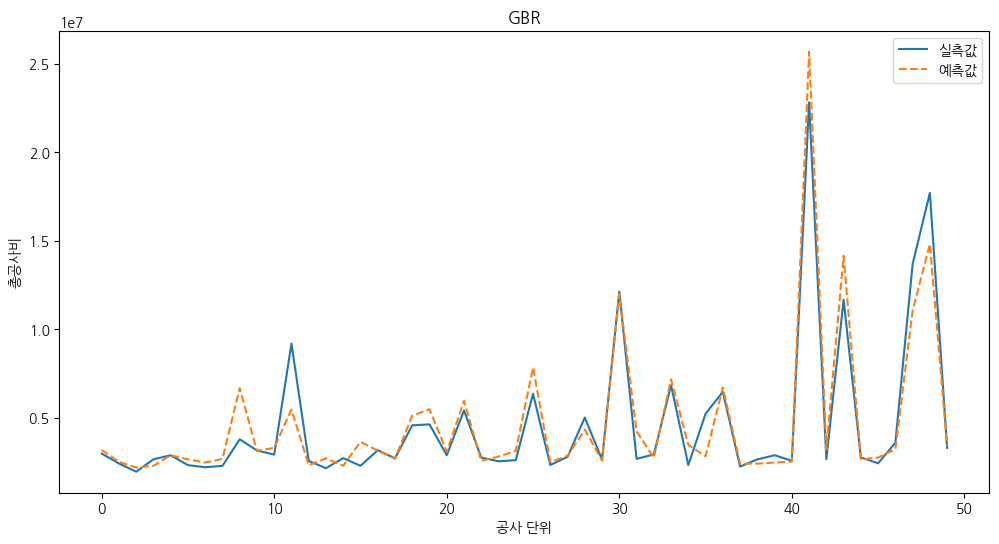

Evaluation: EN
R2_SCORE: 0.651082, MAPE: 18.095856, MSE: 3218114897990.734375, RMSE: 1793910.504454, MAE: 861641.843547
`EN` object has no attribute `feature_importances_`


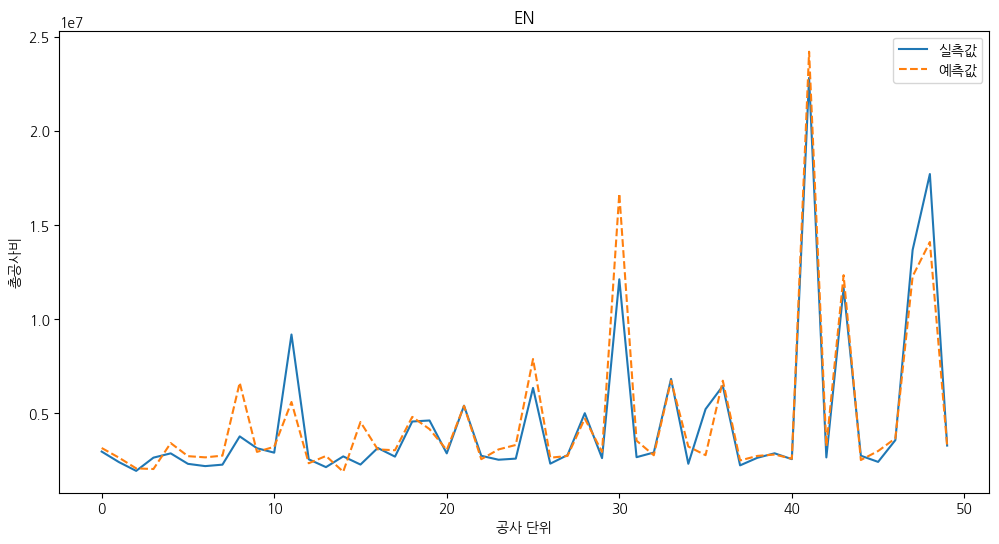

Evaluation: XGR
R2_SCORE: 0.266244, MAPE: 33.792036, MSE: 6767533400609.830078, RMSE: 2601448.327492, MAE: 1647263.895257


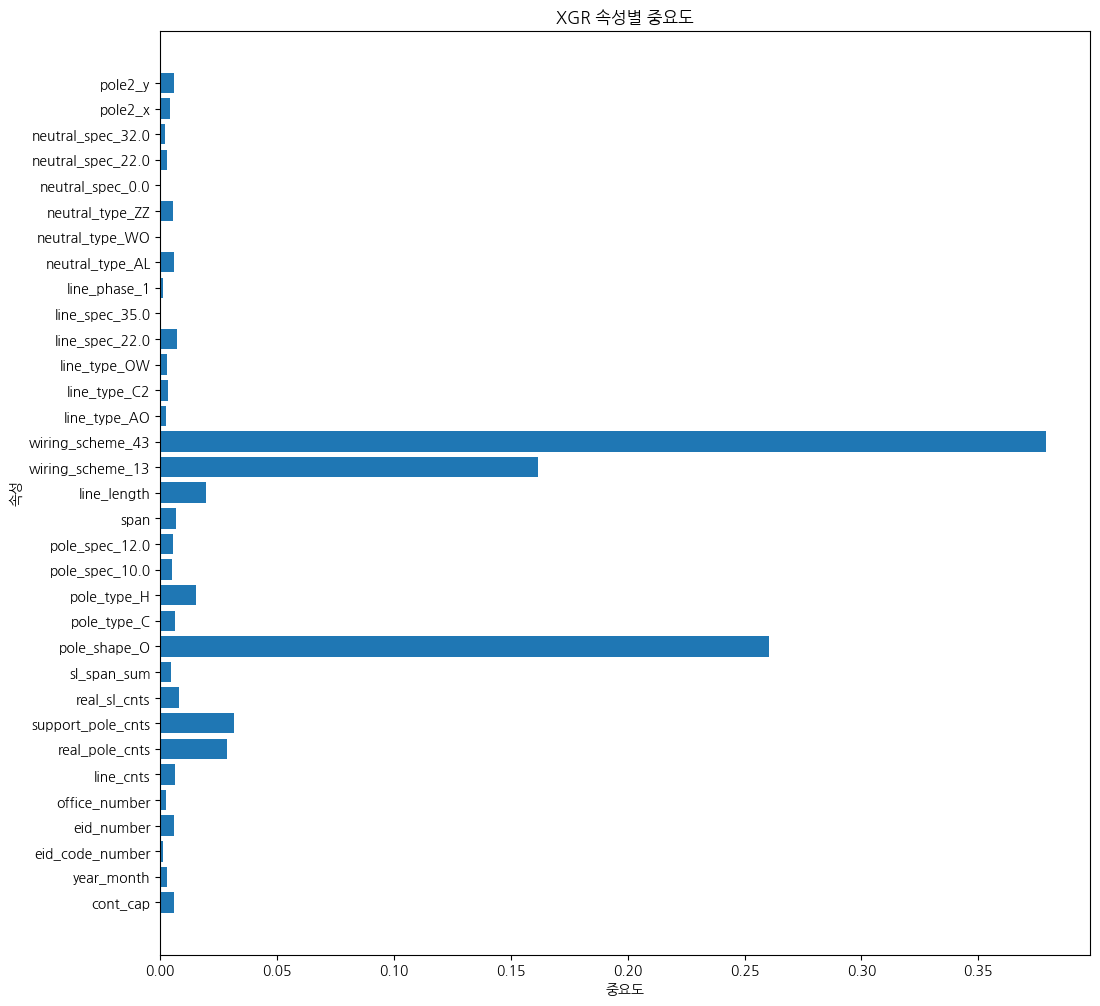

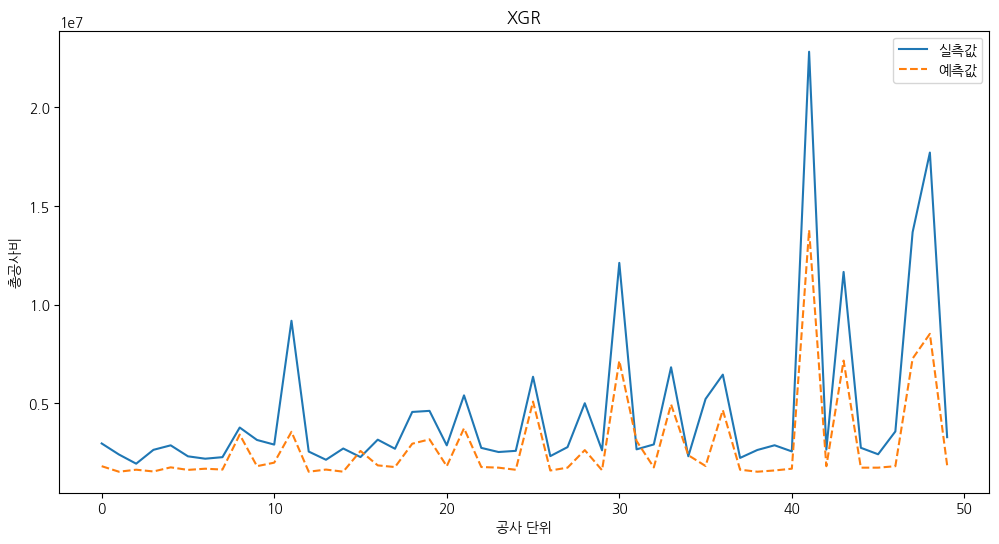

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,0.657722,0.177039,3.156874e+12,1.776759e+06,8.548718e+05
LASSO,0.657695,0.177037,3.157123e+12,1.776829e+06,8.548582e+05
RIDGE,0.657682,0.177051,3.157250e+12,1.776865e+06,8.548586e+05
KNR,0.591681,0.180851,3.765981e+12,1.940614e+06,9.113965e+05
DTR,0.357745,0.216039,5.923605e+12,2.433846e+06,1.080936e+06
RFR,0.657350,0.171700,3.160305e+12,1.777725e+06,8.519190e+05
GBR,0.669503,0.162580,3.048221e+12,1.745916e+06,8.146875e+05
EN,0.651082,0.180959,3.218115e+12,1.793911e+06,8.616418e+05
XGR,0.266244,0.337920,6.767533e+12,2.601448e+06,1.647264e+06
